<a href="https://colab.research.google.com/github/ampereapescador/MetodosI_AnaPerea_JuanGomez/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

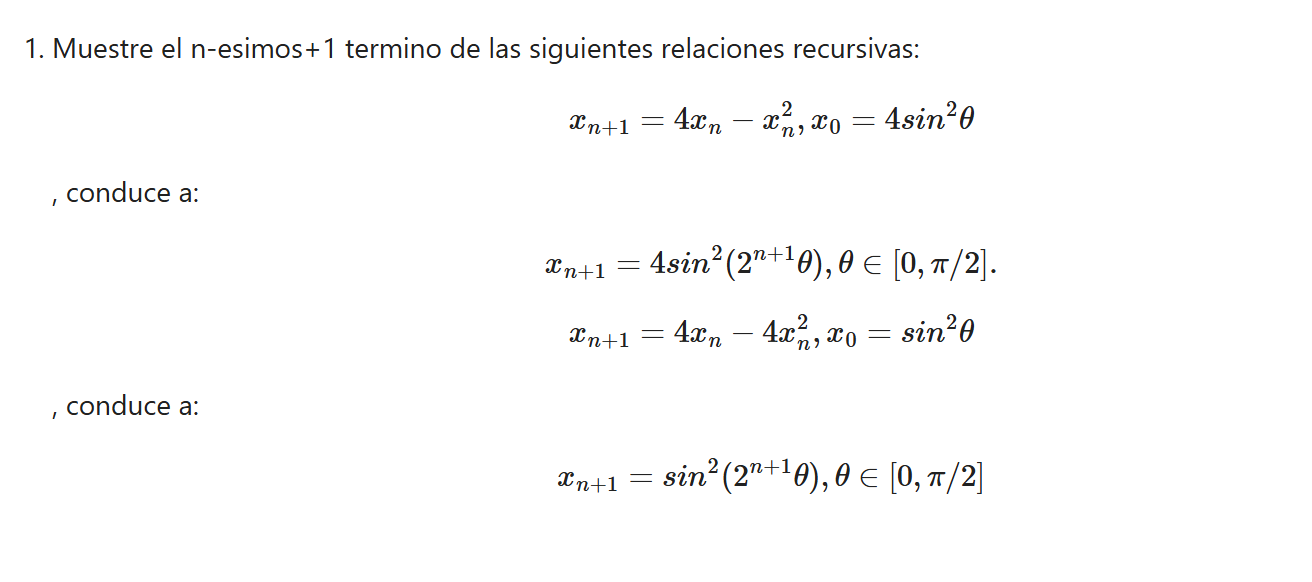


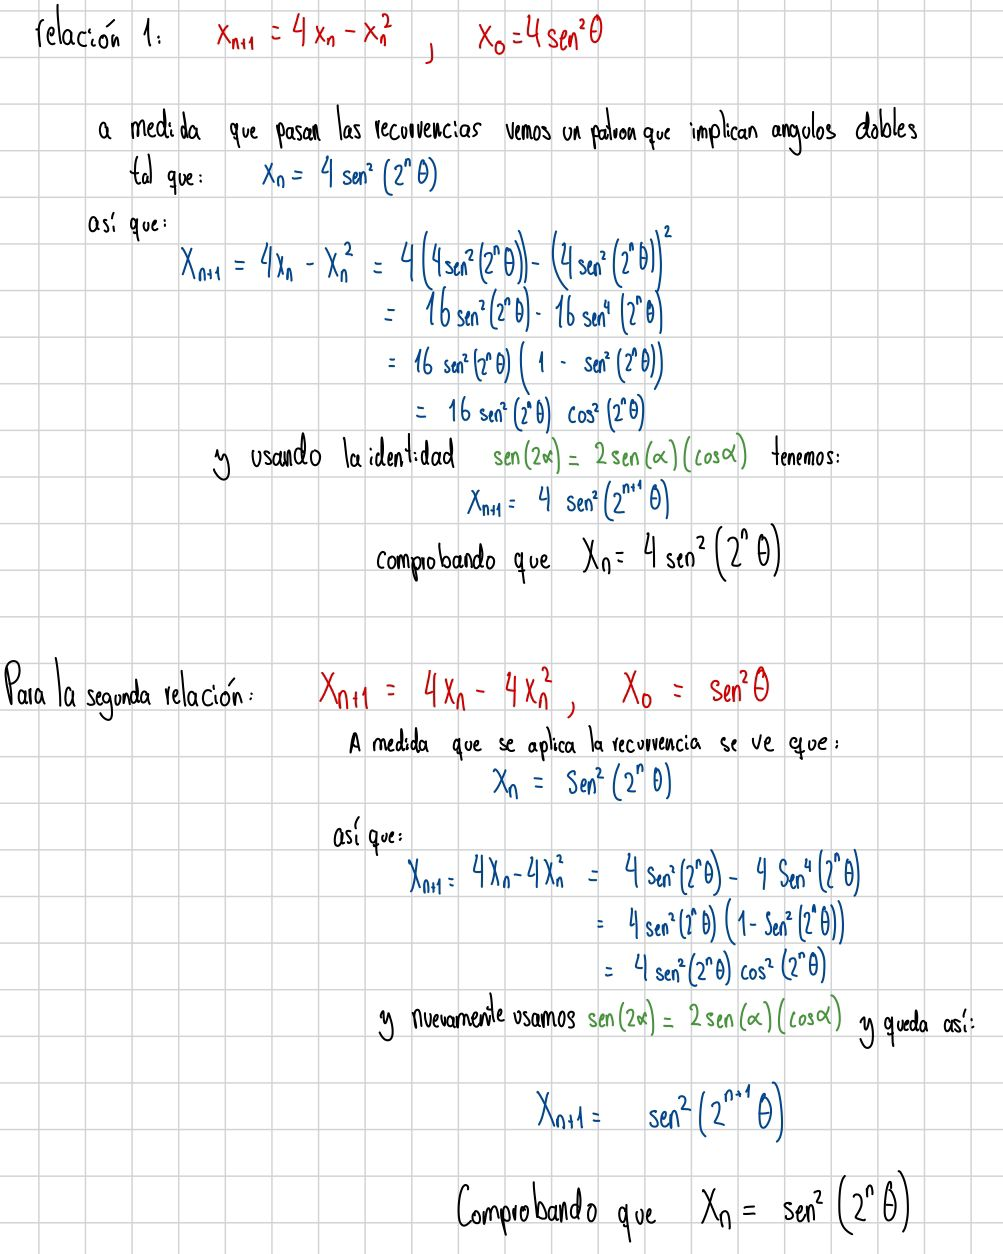

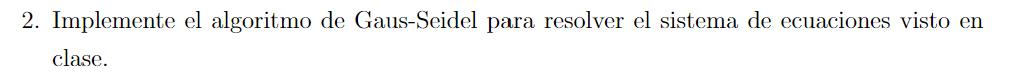

In [10]:
#2
#Sistema de ecuaciones
x = [0,0,0]
a=[[3,-1,-1], [-1,3,1],[2,1,4]]
b=[1,3,7]

# Definicion de la funcion Gus Sidel
def Gaus_Seidel(a, b, x0, tol=1e-10, i=1000):
    n = len(b)
    x = x0.copy()

    for iteration in range(i):
        x_1 = x.copy()

        for i in range(n):
            sum_a = sum(a[i][j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sum_a) / a[i][i]


        if np.linalg.norm(np.array(x) - np.array(x_1), ord=np.inf) < tol:
            return x, iteration + 1

    return x, i

# Datos del sistema
a = [[3, -1, -1],
     [-1, 3, 1],
     [2, 1, 4]]
b = [1, 3, 7]
x0 = [0, 0, 0]  # Valores iniciales

# Respuesta Gauss-Seidel
rpta = Gaus_Seidel(a, b, x0)

print("Solución:", rpta)


Solución: ([1.0000000000126035, 0.9999999999949587, 0.9999999999949586], 18)


3. En Python, implemente una clase para solucionar sistemas lineales. El constructor de clase debe recibir la matriz y el vector independiente. El primer metodo de clase resuelve el sistema usando el metodo de Jacobi, y el segundo metodo resuelve el sistema usando el metodo de Gaus-Seidel. En la pantalla debe aparecer el numero de iteraciones necesarias para resolver el problema

In [ ]:
#3
class SistemasLineales:
    def __init__(self, A, b, tol=1e-6, max_iter=1000):
        self.A = np.array(A, dtype=float)
        self.b = np.array(b, dtype=float)
        self.tol = tol
        self.max_iter = max_iter

    def metodo_jacobi(self):
        x = np.zeros_like(self.b)
        D = np.diag(self.A)
        R = self.A - np.diagflat(D)

        iteraciones = 0
        for i in range(self.max_iter):
            x_new = (self.b - np.dot(R, x)) / D
            if np.linalg.norm(x_new - x, ord=np.inf) < self.tol:
                break
            x = x_new
            iteraciones += 1

        print(f"Jacobi: Sistema resuelto en {iteraciones} iteraciones.")
        return x

    def metodo_gauss_seidel(self):
        x = np.zeros_like(self.b)
        iteraciones = 0

        for i in range(self.max_iter):
            x_new = np.copy(x)
            for j in range(len(self.b)):
                suma = sum(self.A[j][k] * x_new[k] if k < j else self.A[j][k] * x[k] for k in range(len(self.b)))
                x_new[j] = (self.b[j] - suma + self.A[j][j] * x[j]) / self.A[j][j]

            if np.linalg.norm(x_new - x, ord=np.inf) < self.tol:
                break
            x = x_new
            iteraciones += 1

        print(f"Gauss-Seidel: Sistema resuelto en {iteraciones} iteraciones.")
        return x

# Ejemplo de uso
A = [[4, -1, 0, 0],
     [-1, 4, -1, 0],
     [0, -1, 4, -1],
     [0, 0, -1, 3]]

b = [15, 10, 10, 10]

sistema = SistemasLineales(A, b)

# Solucion usando Jacobi
solucion_jacobi = sistema.metodo_jacobi()
print("Solución usando Jacobi:", solucion_jacobi)

# Solucion usando Gauss-Seidel
solucion_gauss_seidel = sistema.metodo_gauss_seidel()
print("Solución usando Gauss-Seidel:", solucion_gauss_seidel)

4. 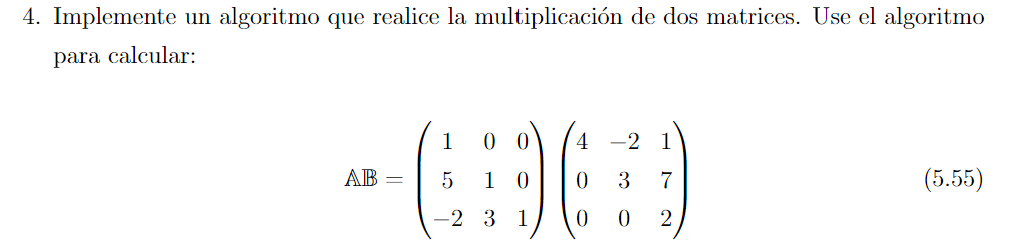

In [12]:
#4
def multiplicacion_MM(mA, mB):
    n = len(mA)
    # Crear una matriz resultado llena de ceros
    matriz_resultado = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(n):
            for k in range(n):
                matriz_resultado[i][j] += mA[i][k] * mB[k][j]

    return matriz_resultado

# Calculo AB
mA = [
    [1, 0, 0],
    [5, 1, 0],
    [-2, 3, 1]
]

mB = [
    [4, -2, 1],
    [0, 3, 7],
    [0, 0, 2]
]

# Multiplicamos las matrices
resultado =  multiplicacion_MM(mA, mB)

# Imprimir el resultado
print("Resultado de la multiplicación:")
for fila in resultado:
    print(fila)


Resultado de la multiplicación de matrices:
[4, -2, 1]
[20, -7, 12]
[-8, 13, 21]


5. 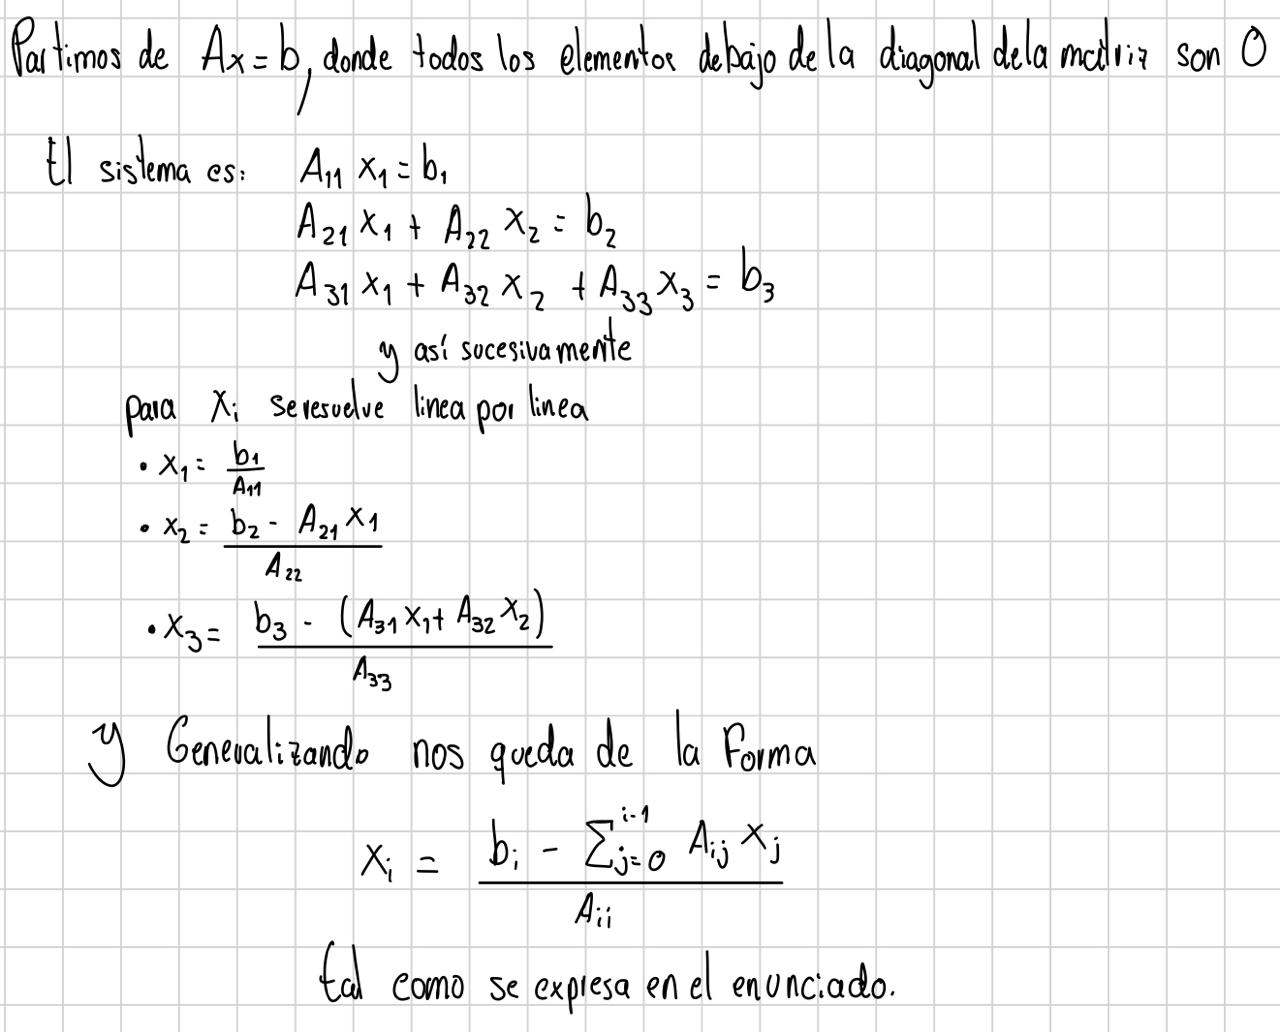

6. 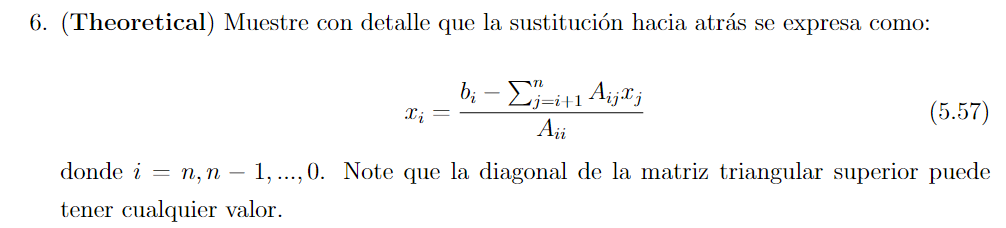
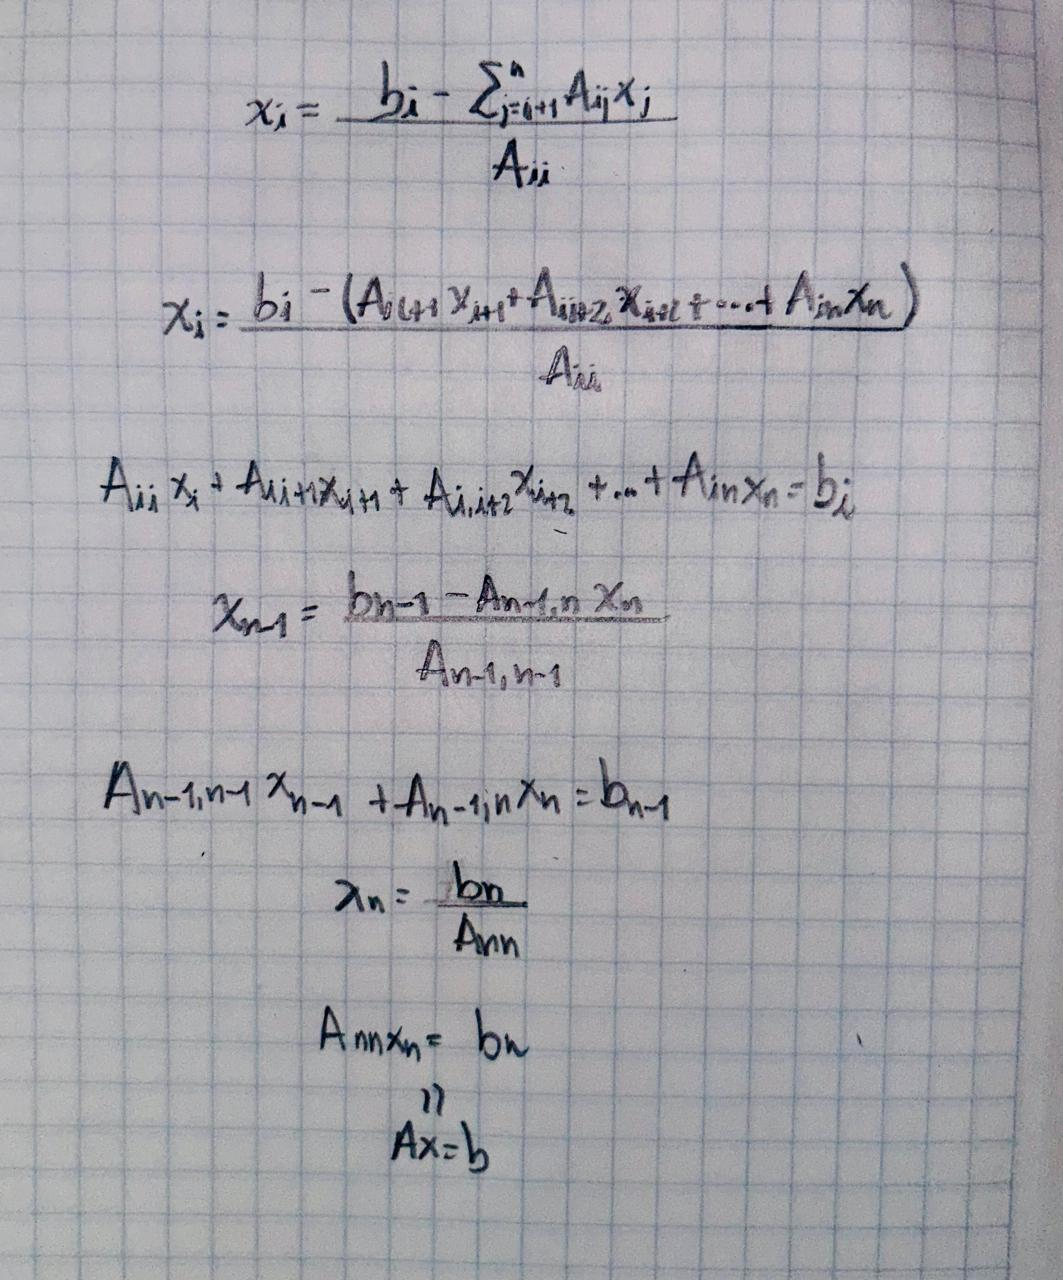

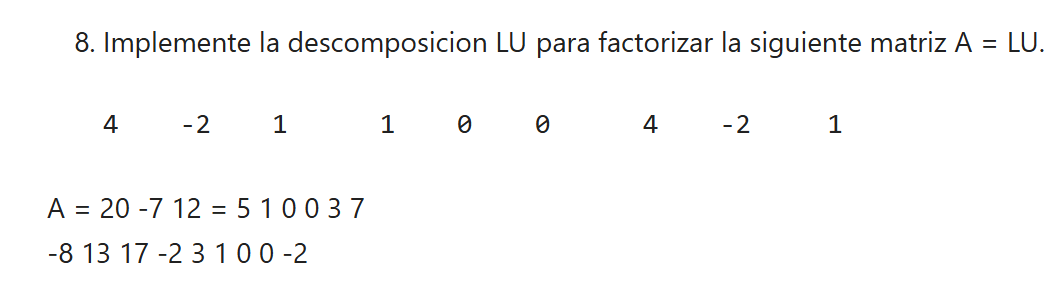

In [ ]:
#8
def LU(A):
    n = len(A)
    L = np.eye(n)
    U = np.zeros((n, n))

    for i in range(n):
        for k in range(i, n):
            U[i, k] = A[i, k] - sum(L[i, j] * U[j, k] for j in range(i))

        for k in range(i + 1, n):
            L[k, i] = (A[k, i] - sum(L[k, j] * U[j, i] for j in range(i))) / U[i, i]

    return L, U

A = np.array([[4, -2, 1],
              [20, -7, 12],
              [-8, 13, 17]], dtype=float)


L, U = LU(A)


print("Matriz L:")
print(L)
print("Matriz U:")
print(U)


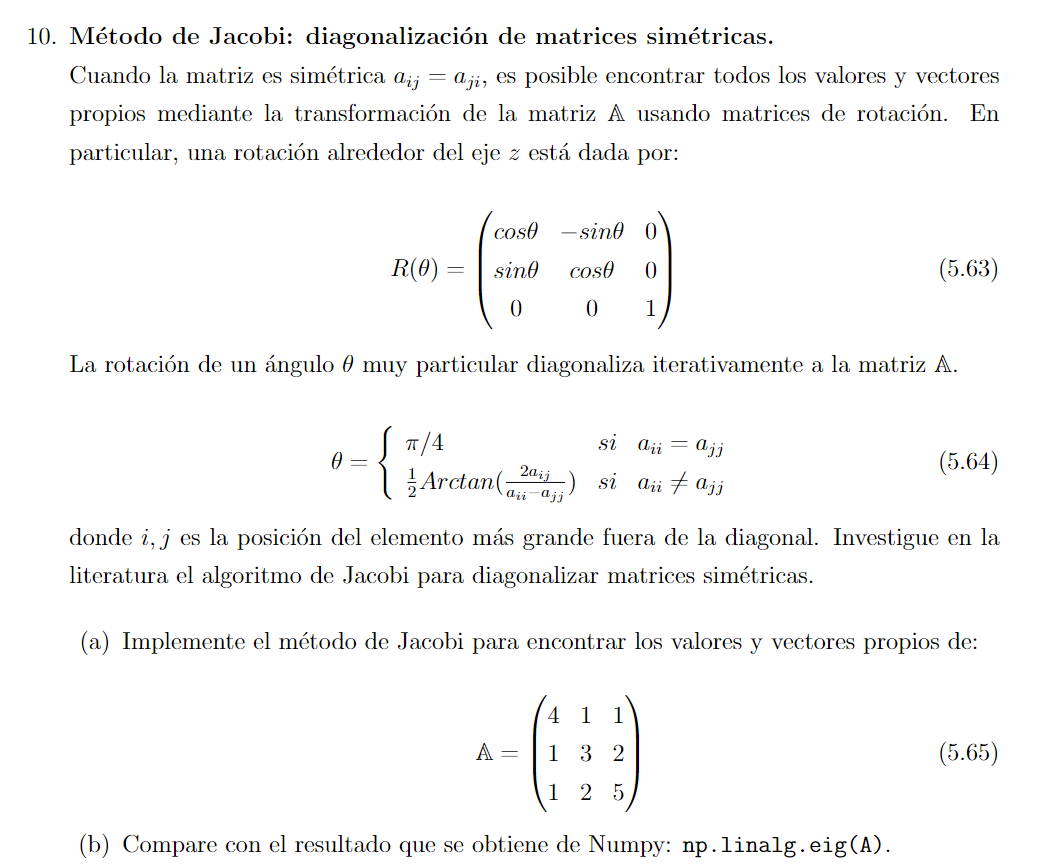

In [14]:
#10
import numpy as np

# (p, q) del mayor elemento fuera de la diagonal
def max_diagonal(A):
    n = len(A)
    p, q = 0, 1
    max_value = abs(A[p, q])
    for i in range(n):
        for j in range(i + 1, n):
            if abs(A[i, j]) > max_value:
                max_value = abs(A[i, j])
                p, q = i, j
    return p, q

#  matriz de rotación de Jacobi
def jacobi_rotacion(A, p, q):
    if A[p, q] != 0:
        phi = 0.5 * np.arctan2(2 * A[p, q], A[q, q] - A[p, p])
        cos_phi = np.cos(phi)
        sin_phi = np.sin(phi)
    else:
        cos_phi = 1
        sin_phi = 0

    # Crear la matriz de rotación
    n = len(A)
    R = np.identity(n)
    R[p, p] = cos_phi
    R[q, q] = cos_phi
    R[p, q] = -sin_phi
    R[q, p] = sin_phi

    return R

# Método de Jacobi para encontrar los valores y vectores propios
def jacobi_method(A, tol=1e-10, max_iterations=1000):
    n = len(A)
    A = np.array(A, dtype=float)
    V = np.identity(n)  # Matriz de vectores propios

    for _ in range(max_iterations):
        p, q = max_diagonal(A)
        if abs(A[p, q]) < tol:
            break

        # Obtener la matriz de rotación
        R = jacobi_rotacion(A, p, q)

        # Actualizar la matriz A y la matriz de vectores propios
        A = R.T @ A @ R
        V = V @ R

    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors

# Matriz 3x3 dada
A = np.array([[4, 1, 1],
              [1, 3, 2],
              [1, 2, 5]])

# Aplicar el método de Jacobi
valores_propios_jacobi, vectores_propios_jacobi = jacobi_method(A)

#B.
valores_propios_numpy, vectores_propios_numpy = np.linalg.eig(A)

# Resultados con ambos metodos
print("Valores propios - Jacobi:", valores_propios_jacobi)
print("Vectores propios - Jacobi:\n", vectores_propios_jacobi)

print("\nValores propios - Numpy:", valores_propios_numpy)
print("Vectores propios- Numpy:\n", vectores_propios_numpy)


Valores propios - Jacobi: [6.82634765 3.39729296 1.77635939]
Vectores propios - Jacobi:
 [[ 0.40948794 -0.88529855  0.22037718]
 [ 0.59342524  0.07499495 -0.80138769]
 [ 0.69294019  0.45893598  0.55606804]]

Valores propios - Numpy: [6.89510652 3.39729507 1.70759841]
Vectores propios- Numpy:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


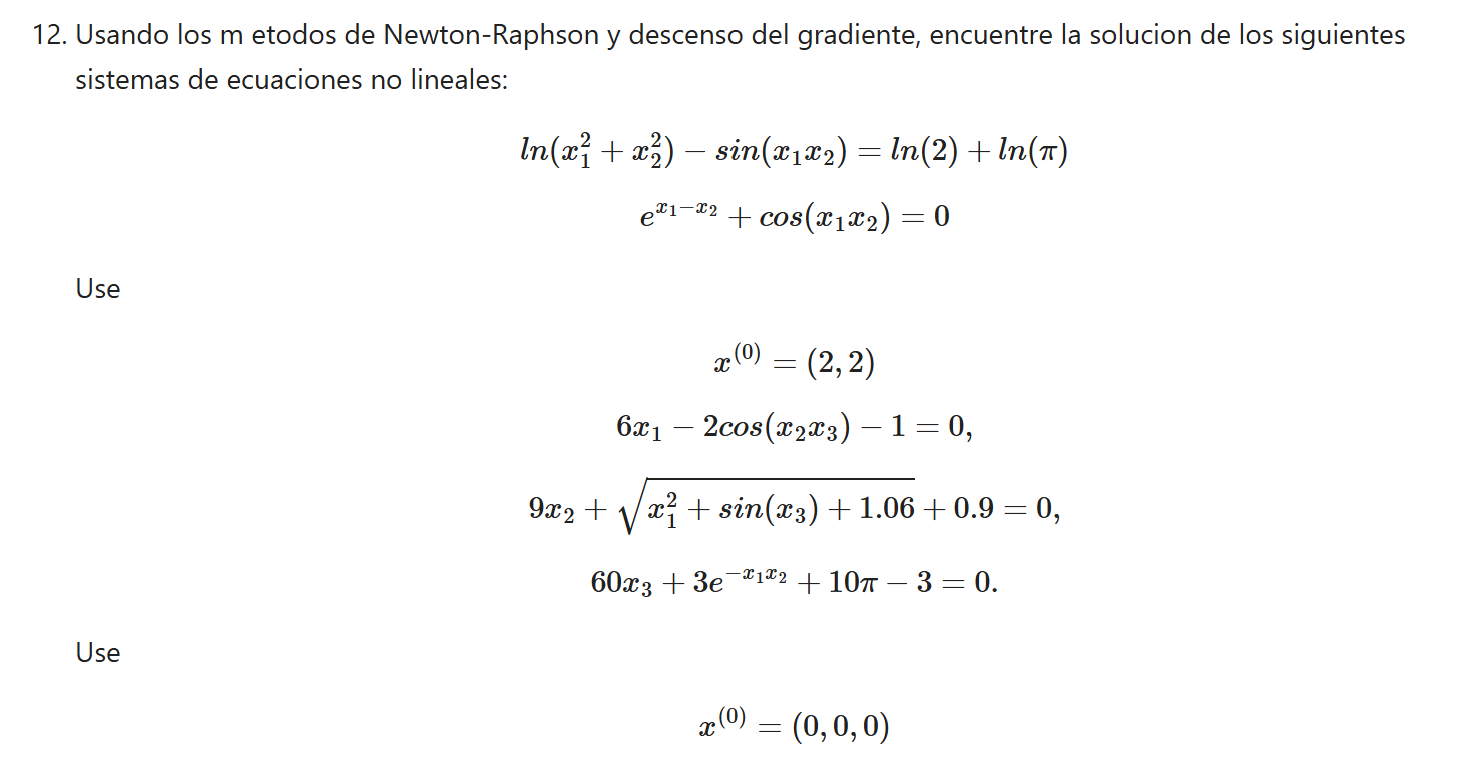

In [ ]:
#12
def sistema1(vars):
    x1, x2 = vars
    f1 = np.log(x1**2 + x2**2) - np.sin(x1 * x2) - np.log(2) - np.log(np.pi)
    f2 = np.exp(x1 - x2) + np.cos(x1 * x2)
    return [f1, f2]

def sistema2(vars):
    x1, x2, x3 = vars
    f1 = 6*x1 - 2*np.cos(x2 * x3) - 1
    f2 = 9*x2 + np.sqrt(x1**2 + np.sin(x3) + 1.06) + 0.9
    f3 = 60*x3 + 3*np.exp(-x1 * x2) + 10*np.pi - 3
    return [f1, f2, f3]

def jacobiano_sistema1(x1, x2):
    j11 = (2*x1) / (x1**2 + x2**2) - x2 * np.cos(x1 * x2)
    j12 = (2*x2) / (x1**2 + x2**2) - x1 * np.cos(x1 * x2)
    j21 = np.exp(x1 - x2) - x2 * np.sin(x1 * x2)
    j22 = -np.exp(x1 - x2) - x1 * np.sin(x1 * x2)

    return np.array([[j11, j12], [j21, j22]])

def newton_raphson_sistema1(x0, tol=1e-6, max_iter=100):
    x = np.array(x0)
    for i in range(max_iter):
        f = np.array(sistema1(x))
        J = jacobiano_sistema1(x[0], x[1])
        delta_x = np.linalg.solve(J, -f)
        x = x + delta_x
        if np.linalg.norm(delta_x) < tol:
            break
    return x


def jacobiano_sistema2(x1, x2, x3):
    j11 = 6
    j12 = 2*x3 * np.sin(x2 * x3)
    j13 = 2*x2 * np.sin(x2 * x3)

    j21 = x1 / np.sqrt(x1**2 + np.sin(x3) + 1.06)
    j22 = 9
    j23 = (np.cos(x3) / (2 * np.sqrt(x1**2 + np.sin(x3) + 1.06)))

    j31 = -3 * x2 * np.exp(-x1 * x2)
    j32 = -3 * x1 * np.exp(-x1 * x2)
    j33 = 60

    return np.array([[j11, j12, j13], [j21, j22, j23], [j31, j32, j33]])

def newton_raphson_sistema2(x0, tol=1e-6, max_iter=100):
    x = np.array(x0)
    for i in range(max_iter):
        f = np.array(sistema2(x))
        J = jacobiano_sistema2(x[0], x[1], x[2])
        delta_x = np.linalg.solve(J, -f)
        x = x + delta_x
        if np.linalg.norm(delta_x) < tol:
            break
    return x

x0_sistema1 = [2, 2]
x0_sistema2 = [0, 0, 0]


solution_newton_sistema1 = newton_raphson_sistema1(x0_sistema1)
solution_newton_sistema2 = newton_raphson_sistema2(x0_sistema2)

solution_newton_sistema1, solution_newton_sistema2

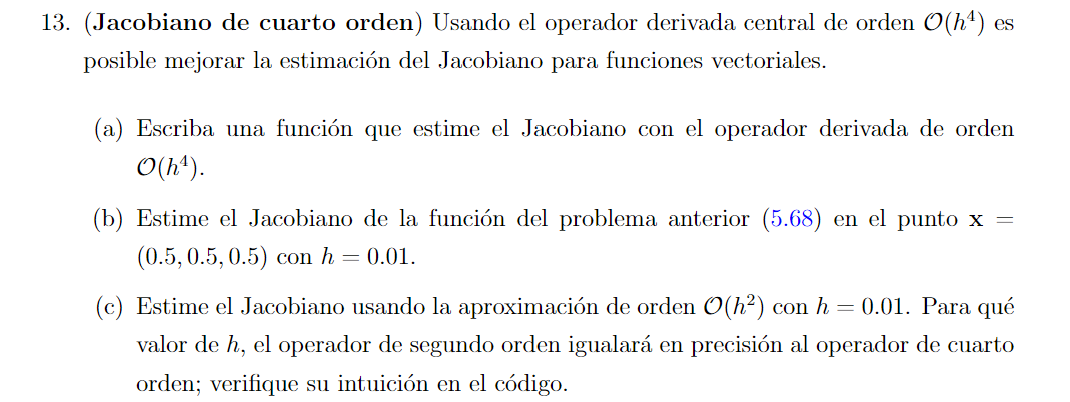

In [9]:
# a


def jacobiano_4orden(f, x, h=1e-5):
    n = len(x)
    m = len(f(x))
    J = np.zeros((m, n))

    for i in range(n):
        # Vector unitario
        e_i = np.zeros(n)
        e_i[i] = 1

        # Aproximación de la derivada de cuarto orden
        J[:, i] = (-f(x + 2*h*e_i) + 8*f(x + h*e_i) - 8*f(x - h*e_i) + f(x - 2*h*e_i)) / (12*h)

    return J

# Ejemplo de función vectorial
def funcion_vectorial(x):
    return np.array([x[0]**2 + x[1]**2, np.sin(x[0]) * np.cos(x[1])])

# Punto de evaluación
x = np.array([1.0, 2.0])

# Estimar el Jacobiano con la derivada de cuarto orden
J_cuarto_orden = jacobiano_4orden(funcion_vectorial, x)
print("Jacobiano con derivada de cuarto orden:\n", J_cuarto_orden)

#c
def jacobiano_segundo_orden(f, x, h=1e-5):
    n = len(x)
    m = len(f(x))
    J = np.zeros((m, n))

    for i in range(n):
        # Vector unitario
        e_i = np.zeros(n)
        e_i[i] = 1

        # Aproximación de la derivada de segundo orden
        J[:, i] = (f(x + h*e_i) - f(x - h*e_i)) / (2*h)

    return J

# Estimar el Jacobiano con la derivada de segundo orden
J_segundo_orden = jacobiano_segundo_orden(funcion_vectorial, x, h=0.01)
print("\nJacobiano con derivada de segundo orden (h=0.01):\n", J_segundo_orden)


Jacobiano con derivada de cuarto orden:
 [[ 2.         4.       ]
 [-0.2248451 -0.7651474]]

Jacobiano con derivada de segundo orden (h=0.01):
 [[ 2.          4.        ]
 [-0.22484135 -0.76513465]]
